In [1]:
import re
import nltk
import pandas as pd
import numpy as np
import seaborn as sbs

In [2]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/reaksa/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/reaksa/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/reaksa/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
df = pd.read_csv('../data/uci_news_aggregator.csv')

In [4]:
ds = df[['TITLE','CATEGORY']]
ds.shape

(422419, 2)

Data Pre-processing


In [ ]:
ds['T']

In [6]:
if(any(ds.isnull().any())):
    print("Data Missiong need clean!")
    print(ds.isnull().sum())
else:
    print("Very Good Data")

Very Good Data


In [8]:
if(any(ds['TITLE'].duplicated() == True)):
    ds['TITLE'].drop_duplicates(inplace=True)
    ds['TITLE'].reset_index(inplace=True,drop=True)
    print(ds['TITLE'].duplicated().sum())
else:
    print("No duplicate")

15964


/var/folders/vx/sf0f544n0hv662y7zddfc0_c0000gn/T/ipykernel_5842/1803672914.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds['TITLE'].drop_duplicates(inplace=True)


In [8]:
ds['TITLE'].duplicated().sum()

15964

<Axes: xlabel='CATEGORY', ylabel='count'>

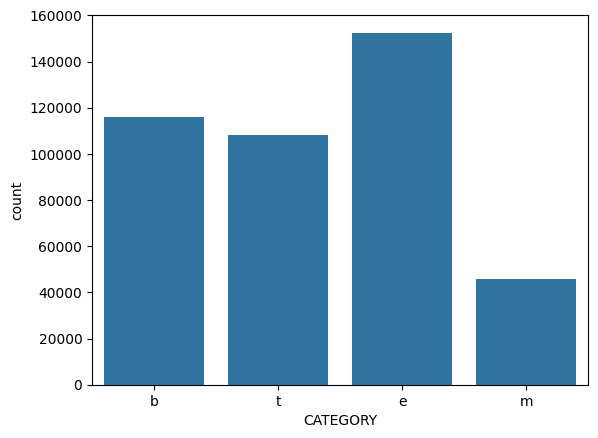

In [9]:
sbs.countplot(x='CATEGORY', data=ds)

In [5]:
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords

In [ ]:
ds.shape

In [6]:
cleaned = []
for i in range(0,len(ds)):
    
    # removing any other words than (a-z) and (A-Z)-> {};():,."/<>-
    msg = re.sub('[^a-zA-Z{};():,."/<>-]',' ',  ds['TITLE'][i])
    
    #converting all texts to lower case
    msg = msg.lower()
    
    # #tokenizing
    msg = msg.split(' ')
    
    # #stemming and removing stopwords
    ps = PorterStemmer()
    msg = [ps.stem(words) for words in msg if not words in set(stopwords.words('english'))]
    msg = ' '.join(msg)
    cleaned.append(msg)

In [ ]:
cleaned

In [7]:
x = np.array(cleaned)

In [8]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

In [9]:
y = lb.fit_transform(ds['CATEGORY'])

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test , y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=45)

In [12]:
X_train.shape

(316814,)

In [13]:
X_test.shape

(105605,)

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

In [18]:
tfidf_vectorizer = TfidfVectorizer() 
x_train = tfidf_vectorizer.fit_transform(X_train)


In [19]:
x_test = tfidf_vectorizer.transform(X_test)

In [22]:
count_vector = CountVectorizer(stop_words = 'english')

In [23]:
training_data = count_vector.fit_transform(X_train)
testing_data = count_vector.transform(X_test)

In [20]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB

In [ ]:
model = GaussianNB()
model.fit(training_data, y_train)

In [25]:
n_model = MultinomialNB(alpha=0.1)
n_model.fit(training_data, y_train)

MultinomialNB(alpha=0.1)

Marix Performance

In [26]:
from sklearn.metrics import accuracy_score, r2_score

In [27]:
score = n_model.score(training_data, y_train)
score

0.9349713080861326

In [28]:
pre = n_model.predict(testing_data)

In [29]:
from sklearn.metrics import classification_report
target = ['Business','Science','Entertainment','Health']
report = classification_report(pre, y_test, target_names=target)
print(report)

               precision    recall  f1-score   support

     Business       0.90      0.91      0.90     28852
      Science       0.96      0.96      0.96     37784
Entertainment       0.92      0.92      0.92     11432
       Health       0.91      0.90      0.90     27537

     accuracy                           0.93    105605
    macro avg       0.92      0.92      0.92    105605
 weighted avg       0.93      0.93      0.93    105605



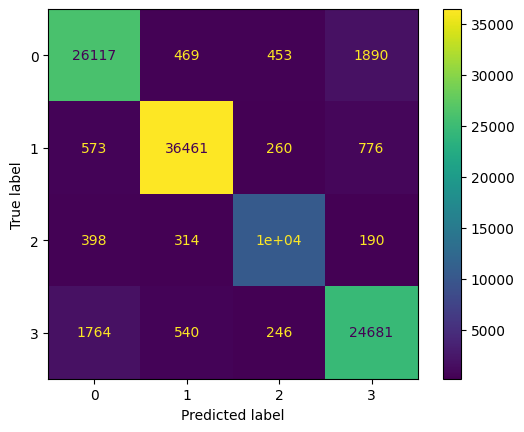

: 

In [30]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
rm = confusion_matrix(y_test, pre, labels=n_model.classes_)
dis = ConfusionMatrixDisplay(confusion_matrix=rm, display_labels=n_model.classes_)
dis.plot()